In [5]:
import sys
!{sys.executable} -m pip install python-Levenshtein

'c:\users\jurus\desktop\machine' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim.models import word2vec
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, model_selection, manifold
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [7]:
#DATA

df_fake = pd.read_csv("C:/Users/jurus/Documents/AGH/Praca inżynierska/Fake.csv")
df_true = pd.read_csv("C:/Users/jurus/Documents/AGH/Praca inżynierska/True.csv")

# Adding a column to indicate whether the news is true or fake
df_true['isfake'] = 0
df_fake['isfake'] = 1

df = pd.concat([df_true, df_fake]).reset_index(drop=True)
df.drop(columns=['date'], inplace=True)

# Combining 'title' and 'text' colmuns together
#df['original'] = df['tweet']
df['original'] = df['title'] + ' ' + df['text']

In [8]:
#DATA CLEANING

# Obtaining additional stopwords from nltk
stop_words = stopwords.words('english')
stop_words.extend(['washington', 'reuters'])

# Removing stopwords and words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        # Taking words that don't belong to stopwords and have more than 2 characters
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

df['clean'] = df['original'].apply(preprocess)

# All unique words present in dataset in one string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
print(df['clean_joined'])

0        budget fight looms republicans flip fiscal scr...
1        military accept transgender recruits monday pe...
2        senior republican senator mueller special coun...
3        russia probe helped australian diplomat trump ...
4        trump wants postal service charge amazon shipm...
                               ...                        
44893    mcpain john mccain furious iran treated sailor...
44894    justice yahoo settles mail privacy class actio...
44895    sunnistan allied safe zone plan territorial bo...
44896    blow million jazeera america finally calls qui...
44897    navy sailors held iranian military signs neoco...
Name: clean_joined, Length: 44898, dtype: object


In [48]:
#COUNT VECTORIZER - counts  the occurrence of each word for every single text in order to create a vector

from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size=0.2)

vectorizer = CountVectorizer()
vectorizer.fit(df['clean_joined'])
# Transforming training and validation data using count vectorizer object
X_train_count = vectorizer.transform(X_train.values)
X_test_count = vectorizer.transform(X_test.values)


Model accuracy is :  0.939532293986637
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4308
           1       0.94      0.95      0.94      4672

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



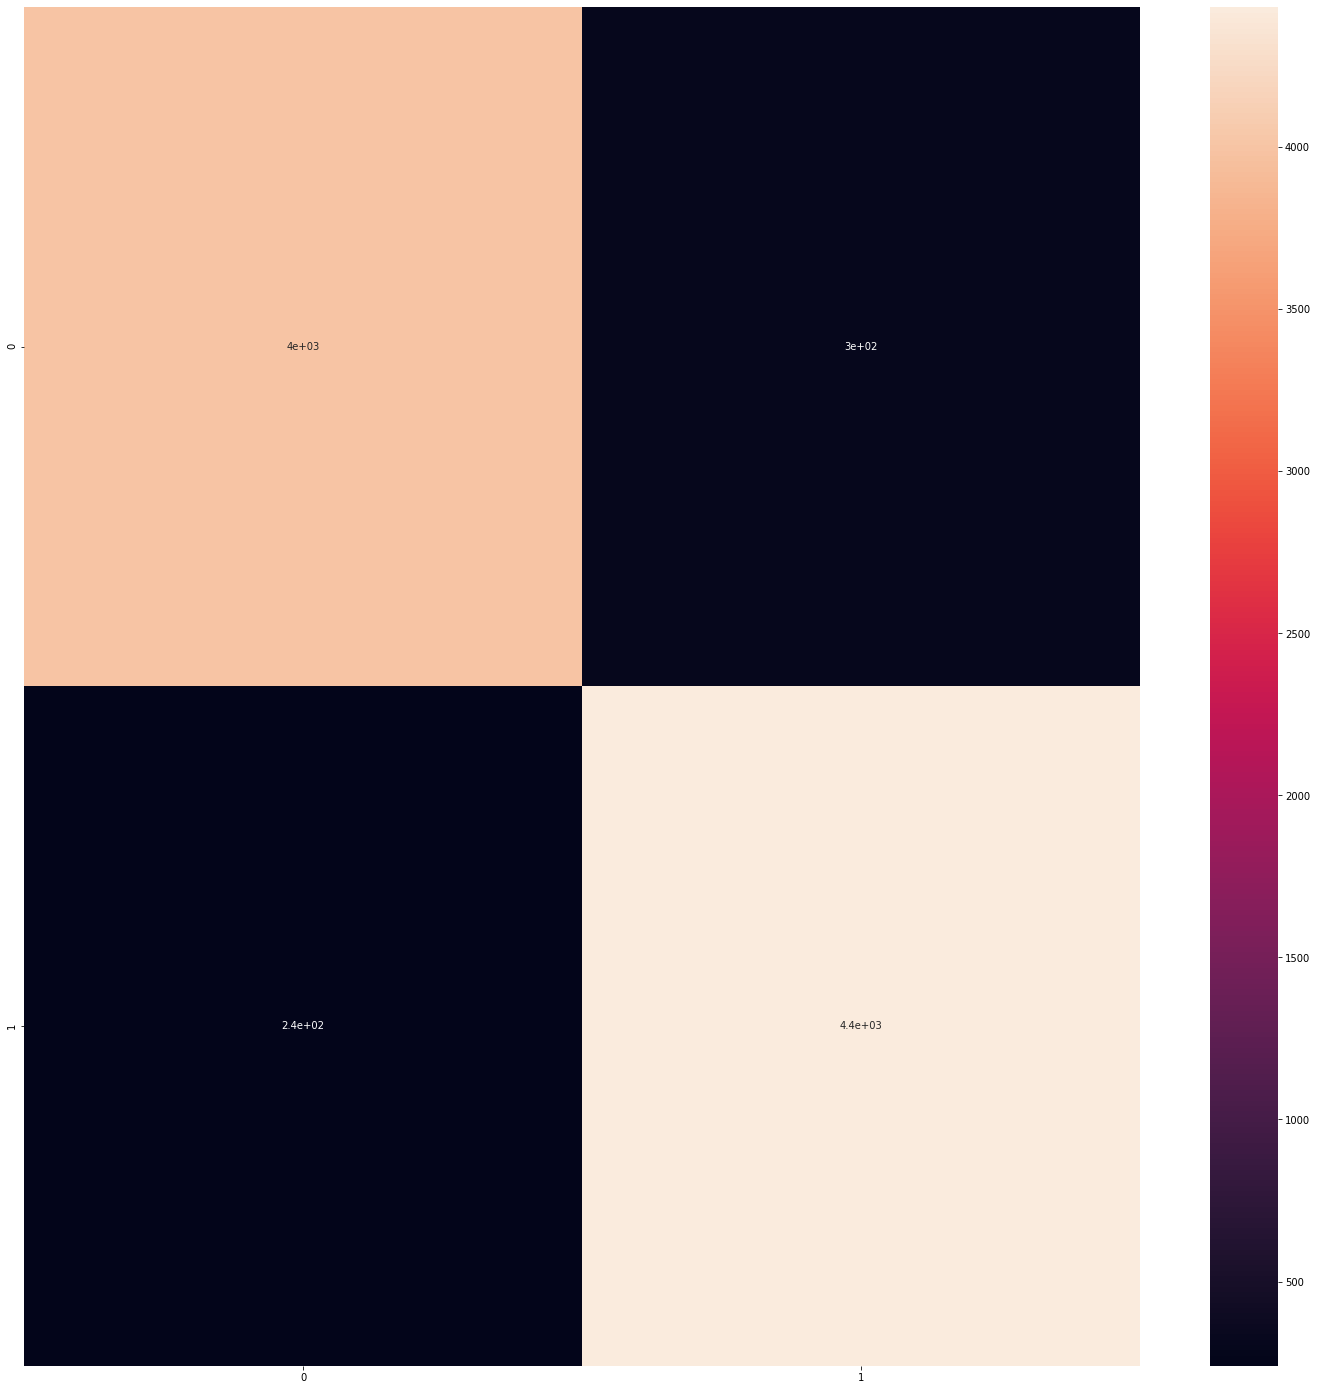

In [49]:
# NAIVE BAYES CLASSIFIER

from sklearn import naive_bayes

model = naive_bayes.MultinomialNB()
model.fit(X_train_count, y_train)

## Plot confusion matrix

pred = model.predict(X_test_count)

prediction = []
# If hte prediction is > 0.5 then the news is real otherwise it is fake
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Getting accuracy
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy is : ", accuracy)
print(classification_report(y_test, prediction))

# Confusion matrix
c_matrix = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(25,25))
sns.heatmap(c_matrix, annot=True)
plt.show()